<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachinLarning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Re-running the KNN classification visualization code after environment reset

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [22]:
# Sample datasets (each 10 sentences for simplicity in plotting)
english_sentences = [
    "Hello, how are you?", "I like reading books.", "This is a cat.", "She is playing outside.",
    "We are going to the park.", "Do you speak English?", "Good morning everyone.", "My name is John.",
    "Can you help me?", "Let's go to the library."
]
uzbek_sentences = [
    "Salom, qalaysan?", "Men kitob o‘qishni yoqtiraman.", "Bu mushuk.", "U tashqarida o‘ynamoqda.",
    "Biz bog‘ga ketmoqdamiz.", "Siz ingliz tilida gaplashasizmi?", "Xayrli tong hammaga.",
    "Mening ismim Jahongir.", "Yordam bera olasizmi?", "Kutubxonaga boraylik."
]
russian_sentences = [
    "Привет, как дела?", "Я люблю читать книги.", "Это кошка.", "Она играет на улице.",
    "Мы идем в парк.", "Ты говоришь по-английски?", "Доброе утро всем.", "Меня зовут Иван.",
    "Можешь мне помочь?", "Пойдем в библиотеку."
]



In [23]:
texts = english_sentences + uzbek_sentences + russian_sentences
labels = ['en'] * len(english_sentences) + ['uz'] * len(uzbek_sentences) + ['ru'] * len(russian_sentences)



In [24]:
# Vectorize the texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)



In [25]:
# Dimensionality reduction for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())



In [26]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.3, random_state=42)



In [27]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [28]:
# Predict and accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



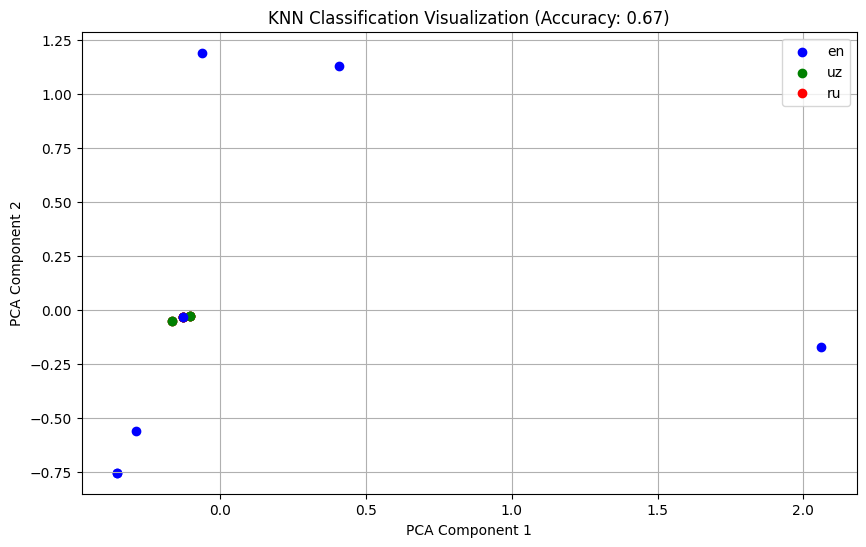

In [29]:
# Plotting
colors = {'en': 'blue', 'uz': 'green', 'ru': 'red'}
plt.figure(figsize=(10, 6))
for i, label in enumerate(y_train):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[label], label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")
plt.title(f"KNN Classification Visualization (Accuracy: {accuracy:.2f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
